# Soil Analysis 

Analysis of the soil characteristics of each plot. Data from Soil Conseil, from 10 plots in 2023. 

In [41]:
import pandas as pd
import os

# Statics 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/curated_data')

# Soil Conseil

In [45]:
df_chem = pd.read_csv('Soil_conseil_2023.csv', index_col=0)

# drop NaN cols and non-numeric ones 
df_chem.dropna(axis=1, inplace=True)
df_chem.drop(columns=['Gravel_Percentage', 'Gravel_Estimate'], axis=1, inplace=True)
df_chem.head()

,Organic_Matter,C_total,Clay_Percentage,Silt_Percentage,Sand_Percentage,N_total,CN_ratio
Plot,,,,,,,
Plot_4,1.9,3.2775,32.9,41.1,26.0,0.13,8.3
Plot_12,3.1,5.3475,34.0,41.3,24.7,0.18,10.0
Plot_9,1.7,2.9325,22.9,42.4,34.7,0.11,9.5
Plot_15,2.6,4.4850,25.6,30.6,43.8,0.16,9.2
Plot_5,1.6,2.7600,29.5,38.5,32.1,0.11,8.7


In [46]:
df_granulo = df_chem[['Clay_Percentage', 'Silt_Percentage', 'Sand_Percentage']]
df_CN = df_chem[['Organic_Matter', 'N_total']]

## Visualizations 
> Heatmap of different characteristics 
> PCA to see if Plots are distinct - does that make sense? 

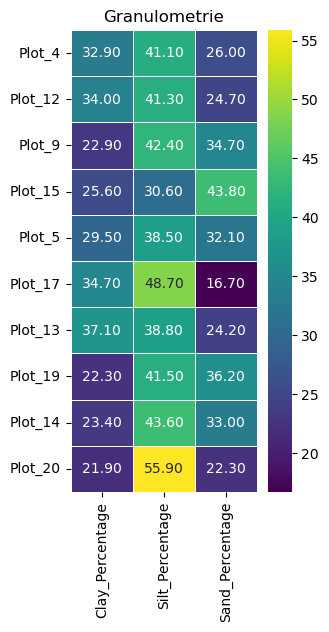

In [5]:
# Heatmap for Granulometrie 
plt.figure(figsize=(3, 6))
sns.heatmap(df_granulo, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

# Set plot labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Granulometrie')

# Show the plot
plt.show()

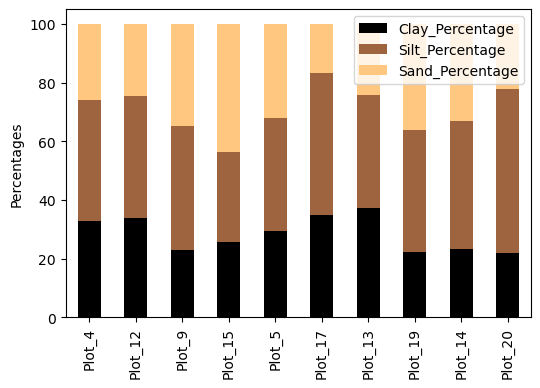

In [87]:
# Create a stacked bar plot for all columns
ax = df_granulo.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='copper')

# Add labels and legend
ax.set_ylabel('Percentages')
ax.set_xlabel('')
#ax.set_title('Granulometrie')
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [10]:
df_CN.head()

,Organic_Matter,N_total
Plot,,
Plot_4,1.9,0.13
Plot_12,3.1,0.18
Plot_9,1.7,0.11
Plot_15,2.6,0.16
Plot_5,1.6,0.11


In [11]:
df_reset = df_CN.reset_index()
df_reset    

,Plot,Organic_Matter,N_total
0,Plot_4,1.90,0.13
1,Plot_12,3.10,0.18
2,Plot_9,1.70,0.11
3,Plot_15,2.60,0.16
4,Plot_5,1.60,0.11
5,Plot_17,1.60,0.12
6,Plot_13,1.70,0.12
7,Plot_19,3.70,0.20
8,Plot_14,3.00,0.18
9,Plot_20,1.12,0.12


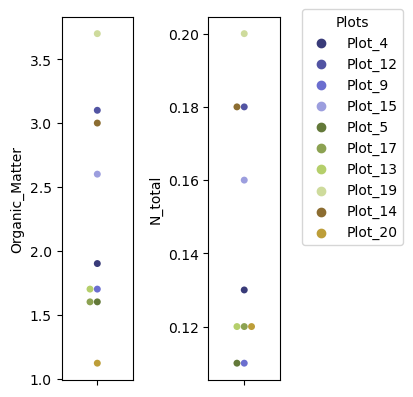

In [72]:
# Swarmplot of the C and N measurements 
fig, axes = plt.subplots(1, 2, figsize=(3, 4))

#sns.swarmplot(ax=axes[0], data=df_reset, y='Organic_Matter', hue="Plot")
#sns.swarmplot(ax=axes[1], data=df_reset, y='N_total', hue="Plot")


for i, column in enumerate(['Organic_Matter', 'N_total']):
    ax = sns.swarmplot(y=column, data=df_reset, hue="Plot", ax=axes[i], palette='tab20b')
    ax.get_legend().remove()  # Remove individual legends in each subplot

# Add a single legend to the side
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.5, title='Plots')

plt.tight_layout()
plt.show()

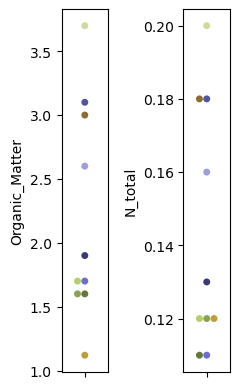

In [115]:
# Swarmplot of the C and N measurements 
fig, axes = plt.subplots(1, 2, figsize=(2.5, 4))

#sns.swarmplot(ax=axes[0], data=df_reset, y='Organic_Matter', hue="Plot")
#sns.swarmplot(ax=axes[1], data=df_reset, y='N_total', hue="Plot")


for i, column in enumerate(['Organic_Matter', 'N_total']):
    ax = sns.swarmplot(y=column, data=df_reset, hue="Plot", ax=axes[i], palette='tab20b')
    ax.get_legend().remove()  # Remove individual legends in each subplot


plt.tight_layout()
plt.show()

### PCA
... this is not really helpful 
--> maybe shows that none of the plots cluster tightly together when it comes to their soil characteristics, good spread? 

In [47]:
# scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_chem)

In [48]:
# explaine 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

data_pca = df_chem.copy()

# Add PCA results to dataframe
data_pca['PC1'] = reduced[:, 0]
data_pca['PC2'] = reduced[:, 1]

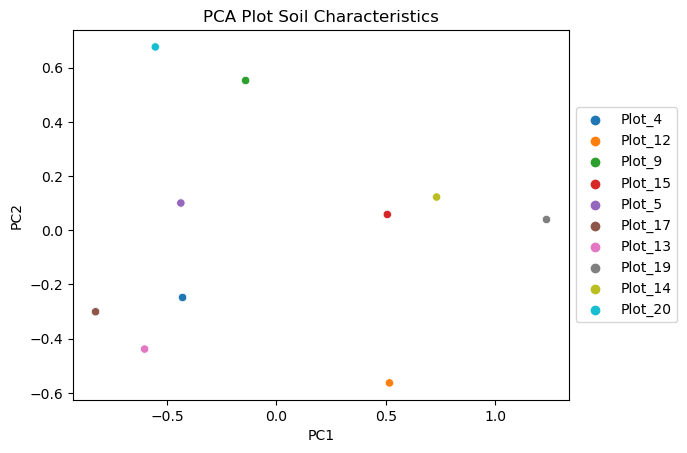

In [49]:
# Plot scatterplot with colors based on Plot 
sns.scatterplot(data=data_pca, x='PC1', y='PC2',hue=data_pca.index)
plt.title('PCA Plot Soil Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Soil pH 

In [50]:
df_pH = pd.read_csv('Soil_pH_LavauxColonialization.csv', index_col=0)
df_pH

,Collection_Date,pH,Measurement_Date,Location,Plot
ID,,,,,
Grenchen_2021-06-11_soil_1A,11.06.21,7.49,30.01.24,Grenchen,Grenchen_Plot_1A
Grenchen_2021-06-11_soil_1B,11.06.21,7.41,30.01.24,Grenchen,Grenchen_Plot_1B
Grenchen_2021-06-11_soil_1C,11.06.21,7.45,30.01.24,Grenchen,Grenchen_Plot_1C
Grenchen_2021-06-11_soil_1A_ref,11.06.21,7.32,30.01.24,Grenchen,Grenchen_Plot_1A
Grenchen_2021-06-11_soil_1B_ref,11.06.21,7.36,30.01.24,Grenchen,Grenchen_Plot_1B
...,...,...,...,...,...
Lavaux_2023-08-24_soil_Plot14,24.08.23,7.64,08.12.23,Lavaux,Lavaux_Plot14
Lavaux_2023-08-24_soil_Plot15,24.08.23,7.51,08.12.23,Lavaux,Lavaux_Plot15
Lavaux_2023-08-24_soil_Plot19,24.08.23,7.59,08.12.23,Lavaux,Lavaux_Plot19


## Soil pH lineplots

/var/folders/vs/cscnsm_n1pq4d37fdkylmm940000gq/T/ipykernel_33043/2538731401.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


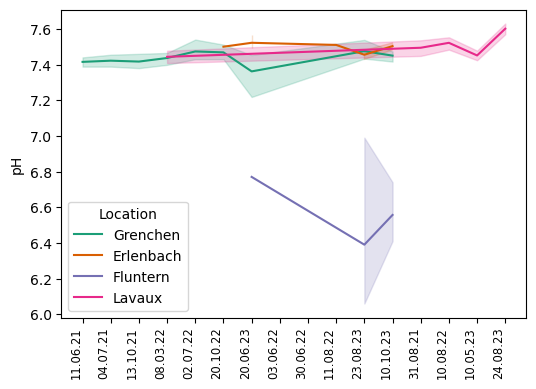

In [86]:
# Plot scatterplot with colors based on Plot 

## Play with the color palette
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=df_pH, x='Collection_Date', y='pH', hue=df_pH.Location, palette='Dark2')
#plt.title('Soil pH over time')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set(xlabel=None)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

plt.show()

/var/folders/vs/cscnsm_n1pq4d37fdkylmm940000gq/T/ipykernel_33043/3962010381.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


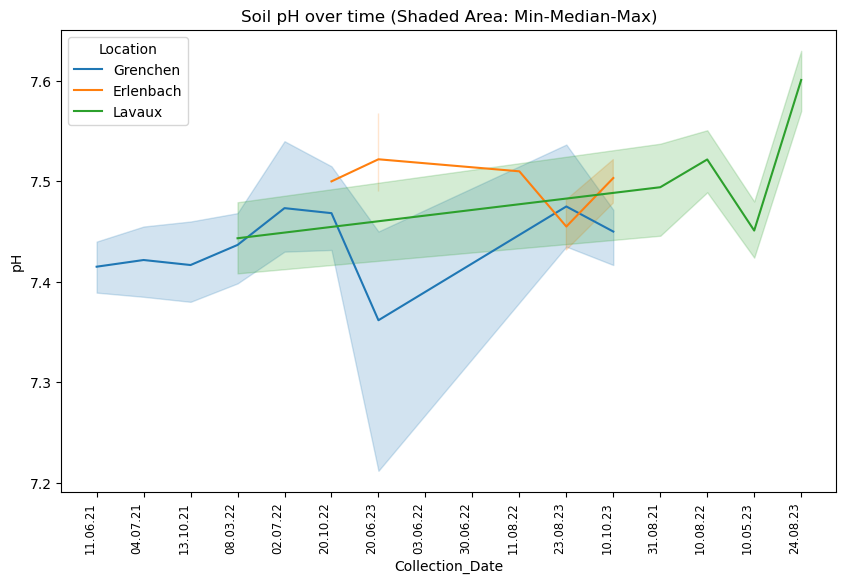

In [66]:
# Plot scatterplot with colors based on Plot 
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_pH[df_pH["Location"] != "Fluntern"], 
                  x='Collection_Date', y='pH', hue=df_pH[df_pH["Location"] != "Fluntern"].Location)
plt.title('Soil pH over time (Shaded Area: Min-Median-Max)')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

plt.show()

## Lavaux soil pH

In [62]:
# filter df to only contain Lavaux samples
Lavaux_pH = df_pH[df_pH["Location"] == "Lavaux"]

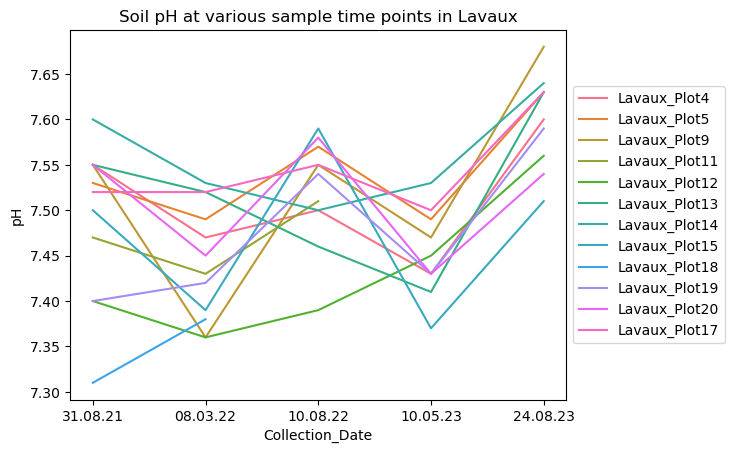

In [63]:
# Plot scatterplot with colors based on Plot 
sns.lineplot(data=Lavaux_pH, x='Collection_Date', y='pH', hue=Lavaux_pH.Plot)
plt.title('Soil pH at various sample time points in Lavaux')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Soil Colonialization pH

--> does the pH become "more narrow" over time after vineyards were planted? 

In [60]:
# filter df to only contain Lavaux samples
SC_pH = df_pH[df_pH["Location"] != "Lavaux"]


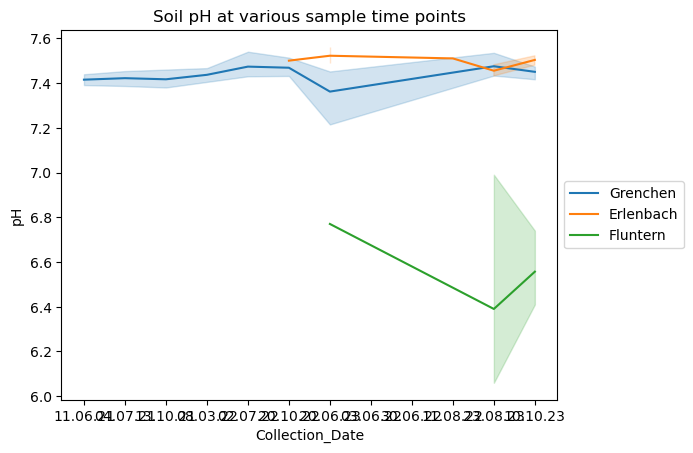

In [61]:
# Plot scatterplot with colors based on Plot 
sns.lineplot(data=SC_pH, x='Collection_Date', y='pH', hue=SC_pH.Location)
plt.title('Soil pH at various sample time points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Statistics

#### Lavaux
No stat. sign. difference between the Plots in Lavaux (p=0.064978).

In [43]:
#  ANOVA
model = ols('pH ~ Plot', data=Lavaux_pH).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

            sum_sq    df         F    PR(>F)
Plot      0.121568  11.0  1.909055  0.064978
Residual  0.248930  43.0       NaN       NaN


#### All soil samples
The pH is statistically sig. different between locations (p = 4.421029e-47) and this is reflected also in the measurement data because different batches of samples were processed on the same day - considering the measurement date nested within location the effect dissipates (p=0.790543).

--> note this is skewed by the Fluntern measurements, see below

In [58]:
model = ols('pH ~ Location', data=df_pH).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq     df           F        PR(>F)
Location  6.187137    3.0  186.408066  4.421029e-47
Residual  1.449356  131.0         NaN           NaN


In [59]:
# Perform nested ANOVA (specifies both the main effects of individual categories as well as their interaction term)
model = ols('pH ~ Location * Measurement_Date', data=df_pH).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq     df         F    PR(>F)
Location                        NaN    3.0       NaN       NaN
Measurement_Date           0.007985   11.0  0.070887  0.790543
Location:Measurement_Date  0.642084   33.0  1.900011  0.030351
Residual                   1.136698  111.0       NaN       NaN


/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 15
  warnings.warn('covariance of constraints does not hav

#### All soil samples without Fluntern
still sign. different 

In [64]:
model = ols('pH ~ Location', data=df_pH[df_pH["Location"] != "Fluntern"]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq     df          F    PR(>F)
Location  0.138096    2.0  11.759088  0.000021
Residual  0.733985  125.0        NaN       NaN


In [65]:
# Perform nested ANOVA (specifies both the main effects of individual categories as well as their interaction term)
model = ols('pH ~ Location * Measurement_Date', data=df_pH[df_pH["Location"] != "Fluntern"]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq     df             F    PR(>F)
Location                   2.659566e-13    2.0  2.436492e-11  0.999996
Measurement_Date           6.600761e-03   11.0  1.099475e-01  0.954126
Location:Measurement_Date  2.591845e-01   22.0  2.158592e+00  0.021830
Residual                   5.948977e-01  109.0           NaN       NaN


/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 11
  warnings.warn('covariance of constraints does not have full '
